<a href="https://colab.research.google.com/github/anandramm/Machine_learning-/blob/master/General_Forecast_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/airline_passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
df.tail()
df.asfreq(freq='MS')
df.index.freq='MS'

In [ ]:
train_df=df.iloc[:109]
test_df=df.iloc[108:]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model=ExponentialSmoothing(train_df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)

In [ ]:
predict=model.fit()

In [ ]:
predictions=predict.forecast(36)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(predictions,test_df))

74.92943823976594

ACF and PACF

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing Non Stationary Data

In [10]:
dfn=pd.read_csv('/content/airline_passengers.csv',index_col='Month',parse_dates=True)
dfn.index.freq='MS'

Importing Stationary Data

In [11]:
dfs=pd.read_csv('/content/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)

In [12]:
dfs.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [13]:
dfs.index.freq='D'

In [14]:
from pandas.plotting import lag_plot

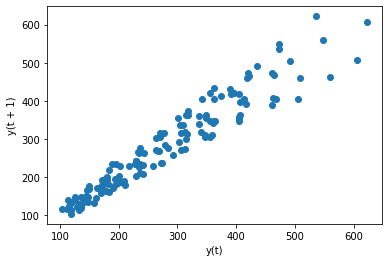

In [15]:
lag_plot(dfn['Thousands of Passengers'])

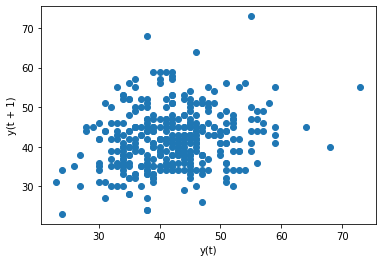

In [16]:
lag_plot(dfs['Births'])

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

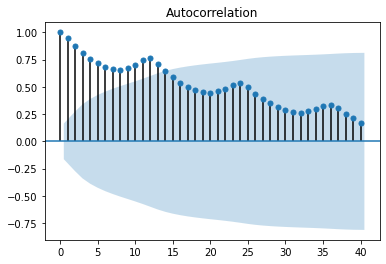

In [19]:
plot_acf(dfn,lags=40);

Auto Regression Model

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AR,ARResults

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('/content/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq='MS'

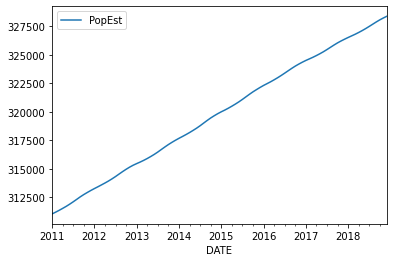

In [3]:
df.plot()

In [4]:
train_data=df.iloc[:84]

In [5]:
test_data=df.iloc[84:]

In [6]:
train_data.tail()

,PopEst
DATE,
2017-08-01,325667
2017-09-01,325866
2017-10-01,326054
2017-11-01,326222
2017-12-01,326378


In [7]:
test_data.head()

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134


In [8]:
model=AR(train_data['PopEst'])

In [9]:
AR1fit=model.fit(maxlag=1)

In [10]:
AR1fit.aic

6.410771237031904

In [11]:
AR1fit.bic

6.498199210807685

In [12]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [13]:
start=len(train_data)
end=len(train_data)+len(test_data)-1

In [14]:
predictions=AR1fit.predict(start=start,end=end)

In [15]:
predictions.rename('AR1_predictions')

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR1_predictions, dtype: float64

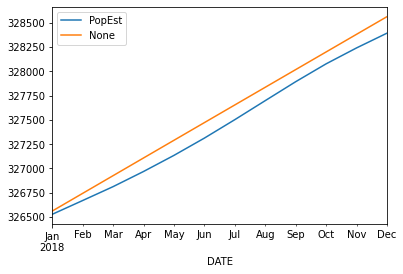

In [16]:
test_data.plot(legend=True)
predictions.plot(legend=True)

In [17]:
AR3fit=model.fit(maxlag=3)

In [19]:
AR3fit.params

const        91.742944
L1.PopEst     2.589781
L2.PopEst    -2.435443
L3.PopEst     0.845522
dtype: float64

In [21]:
predictions3=AR3fit.predict(start=start,end=end)

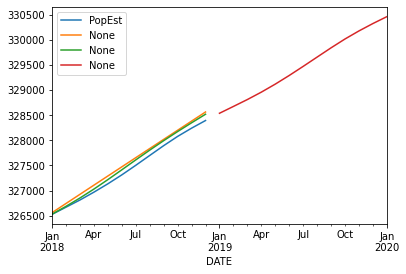

In [28]:
test_data.plot(legend=True)
predictions.plot(legend=True)
predictions3.plot(legend=True)
predictions8.plot(legend=True)

In [23]:
model=AR(df['PopEst'])

In [25]:
AR8fit=model.fit(ic='t-stat')

In [27]:
predictions8=AR8fit.predict(start=len(df),end=len(df)+12)